# MAPAS

## Colunas:

A variável alvo é o valor mediano das casas para os distritos da Califórnia, expressa em dólares.

- `median_income`: renda mediana no grupo de blocos (em dezenas de milhares de dólares)
- `housing_median_age`: idade mediana das casas no grupo de blocos
- `total_rooms`: número cômodos no grupo de blocos
- `total_bedrooms`: número de quartos no grupo de blocos
- `population`: população do grupo de blocos
- `households`: domicílios no grupo de blocos
- `latitude`: latitude do grupo de blocos
- `longitude`: longitude do grupo de blocos
- `ocean_proximity`: proximidade do oceano
  - `NEAR BAY`: perto da baía
  - `<1H OCEAN`: a menos de uma hora do oceano
  - `INLAND`: no interior
  - `NEAR OCEAN`: perto do oceano
  - `ISLAND`: ilha
- `median_house_value`: valor mediano das casas no grupo de blocos (em dólares)

#### Bibliotecas / Importações

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.config import DADOS_LIMPOS
from src.graficos import PALETTE, SCATTER_ALPHA

sns.set_theme(style="white")

In [5]:
df = pd.read_parquet(DADOS_LIMPOS)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.984127,2.555556,0.146591
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.238137,2.109842,0.155797
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,2,4.294117,2.026891,0.260274
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,2,4.242424,2.640152,0.252679
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,2,5.343676,2.362768,0.203216


In [6]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
17559,-121.089996,39.480000,25,1665,374,845,330,1.5603,78100,INLAND,2,5.045455,2.560606,0.224625
17560,-121.209999,39.490002,18,697,150,356,114,2.5568,77100,INLAND,2,6.114035,3.122807,0.215208
17561,-121.220001,39.430000,17,2254,485,1007,433,1.7000,92300,INLAND,2,5.205543,2.325635,0.215173
17562,-121.320000,39.430000,18,1860,409,741,349,1.8672,84700,INLAND,2,5.329513,2.123209,0.219892
17563,-121.239998,39.369999,16,2785,616,1387,530,2.3886,89400,INLAND,2,5.254717,2.616981,0.221185


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float32 
 1   latitude                  17564 non-null  float32 
 2   housing_median_age        17564 non-null  int8    
 3   total_rooms               17564 non-null  int16   
 4   total_bedrooms            17564 non-null  int16   
 5   population                17564 non-null  int16   
 6   households                17564 non-null  int16   
 7   median_income             17564 non-null  float32 
 8   median_house_value        17564 non-null  int32   
 9   ocean_proximity           17564 non-null  category
 10  median_income_cat         17564 non-null  int64   
 11  rooms_per_household       17564 non-null  float32 
 12  population_per_household  17564 non-null  float32 
 13  bedrooms_per_room         17564 non-null  floa

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
count,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000
mean,-119.509995,35.602200,27.276873,2510.510875,515.378046,1386.315019,483.979447,3.696602,189570.803803,2.952460,5.253923,2.934664,0.211643
std,1.984251,2.147238,11.323957,1593.977891,320.848886,844.889138,295.559700,1.541926,95971.413796,1.006761,1.134086,0.691409,0.048315
min,-124.300003,32.540001,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.000000,1.714286,0.750000,0.113535
25%,-121.599998,33.919998,18.000000,1464.750000,300.000000,816.000000,287.000000,2.547375,114300.000000,2.000000,4.446466,2.470259,0.176919
50%,-118.459999,34.240002,28.000000,2131.000000,438.000000,1196.000000,415.000000,3.479200,171400.000000,3.000000,5.205450,2.852657,0.203465
75%,-117.980003,37.669998,36.000000,3124.000000,643.000000,1738.000000,605.000000,4.622525,243800.000000,4.000000,5.961016,3.306427,0.239151
max,-114.550003,41.950001,51.000000,11026.000000,2205.000000,5804.000000,1979.000000,10.594100,500000.000000,5.000000,10.352942,5.392954,0.406295


Criando uma visualização com o gráfico de dispersão, com base na longitude e latitude, podemos verificar que os dados fazer uma representação na cidade da Califórnia, sendo possível comparar com uma imagem da cidade via satélite. As imagens podem ser visualizadas pelo site pelas informações da Califórnia disponibilizadas pela Wikipédia.

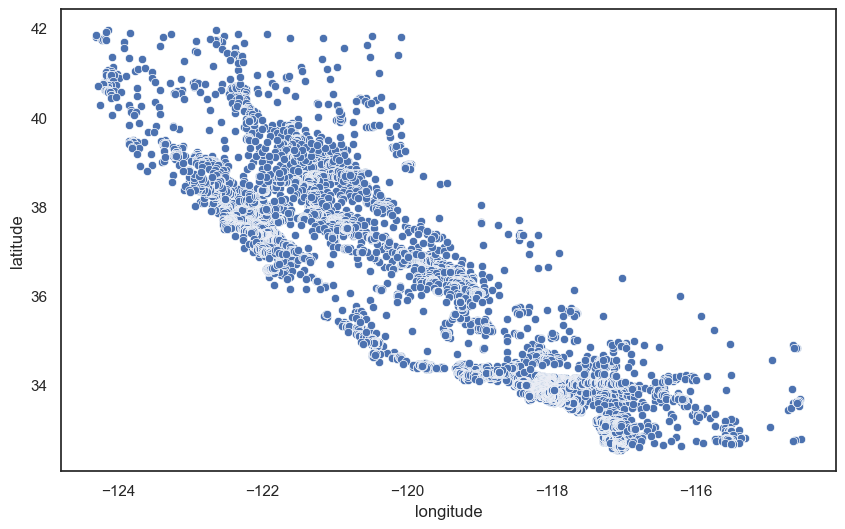

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=df, x="longitude", y="latitude", ax=ax);

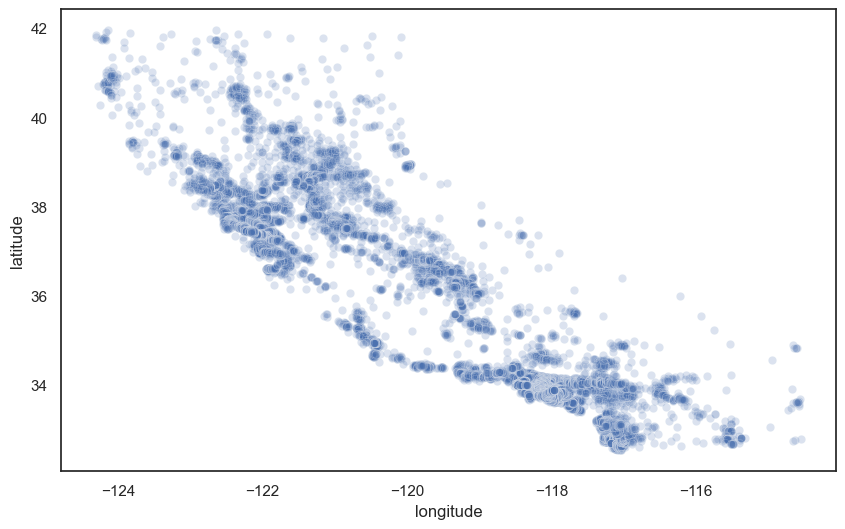

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=df, x="longitude", y="latitude", ax=ax, alpha=SCATTER_ALPHA);

        Deixando os pontos um pouco mais translúcidos (transparentes), é possível identificar os pontos com maior densidade, pela intensidade da cor azul, outro ponto importantes são as partes brancas indicando acúmulo de pontos, já que as bordas de cada ponto tem essa cor predominante.

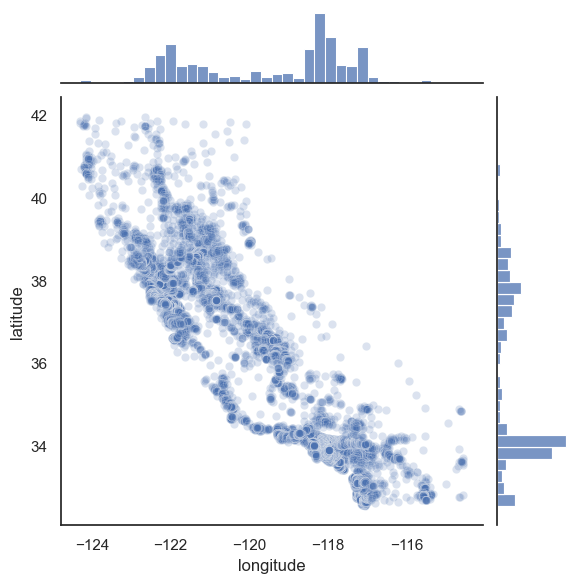

In [13]:
sns.jointplot(data=df, x="longitude", y="latitude", alpha=SCATTER_ALPHA);

        O gráfico jointplot exibe o gráfico de dispersão com histogramas representando a densidade em cada eixo. Os pontos do histograma com elevação predominante representam o maior acúmulo de dados na direção do eixo.
        Ex.:
            Em latitude 34 predominam os picos do eixo y, em longitude aproximadamente -118 predominam os picos do eixo x, o encontro entre elevações caracterizam uma alta densidade nod dados nessa parte da região.

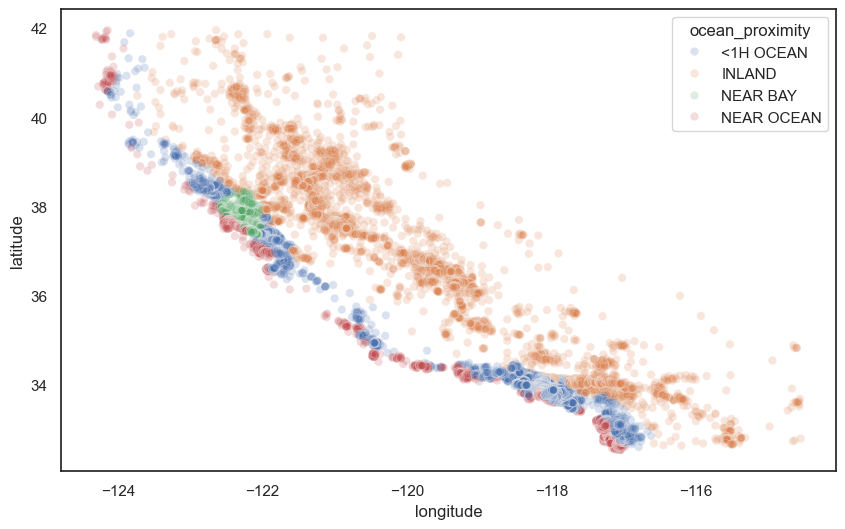

In [15]:
# usando uma variável categórica para destacar por categoria os pontos 
# predominantes no gráfico. 
# Cada categoria representa uma cor, assim podemos saber as situações
# de maior frequência.
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    data=df, 
    x="longitude", 
    y="latitude", 
    ax=ax, 
    alpha=SCATTER_ALPHA,
    hue="ocean_proximity"
);

Pegando um mapa um pouco mais detalhado como, por exemplo, https://www.infoplease.com/atlas/north-america/united-states/california-map, podemos saber aonde cada categoria está localizada. O ponto verde é a famosa baia de San Francisco, tanto quem mora perto do oceano ou distante dele. Se a categoria ISLAND ainda estivesse presente na base de dados, seria possível identificá-las em comparação com as ilhas no mapa do site acima.

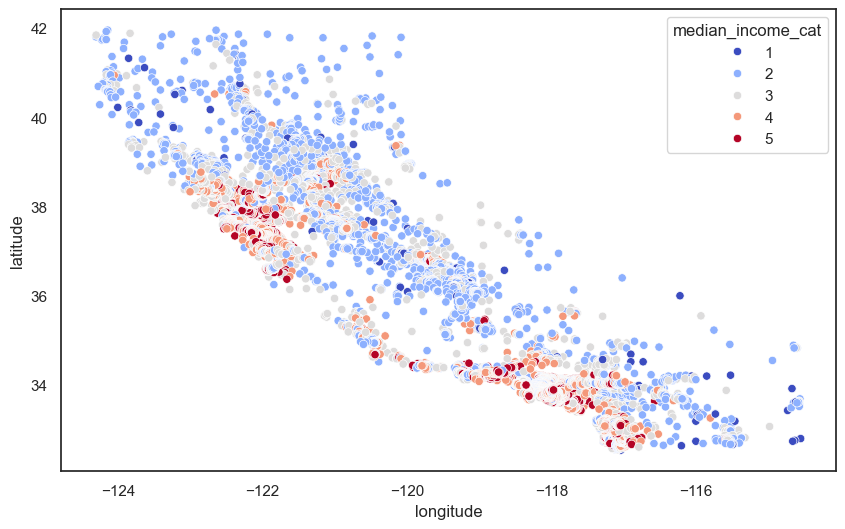

In [17]:
# a partir da variável categórica criada para complementar a base
# vamos analisar a relação da variável com uma correlação consideravelmente forte
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    data=df, 
    x="longitude", 
    y="latitude", 
    ax=ax, 
    alpha=1,
    hue="median_income_cat",
    palette=PALETTE
);

        A partir da correlação forte entre a variável median_house_value(valor mediano das casas) e median_income_cat (categorias entre a renda mediana), as categorias são crescentes e destacam renda mediana nos grupos de blocos, quanto maior o valor, maior a renda predominante no bloco registrado. Em primeira análise, os blocos mais próximos da baia e algumas cidades mais populares, como Los Angeles e San Diego, possuem uma renda mais elevada, indicando casas com valores elevados. Em segunda análise, a renda mediana é predominante na parte central do gráfico, havendo algumas exceções espalhadas. Em terceira análise, quanto mais distantes do mar, no Norte, no Sul e mais próximo do interior os blocos de casas estão, a tendência é que a renda dos blocos seja menor, indicando casas mais baratas nessas regiões. 
As regiões do mapa podem ser mais precisas [Aqui](https://www.reddit.com/r/Maps/comments/wd9bhw/regions_of_california/?tl=pt-br).

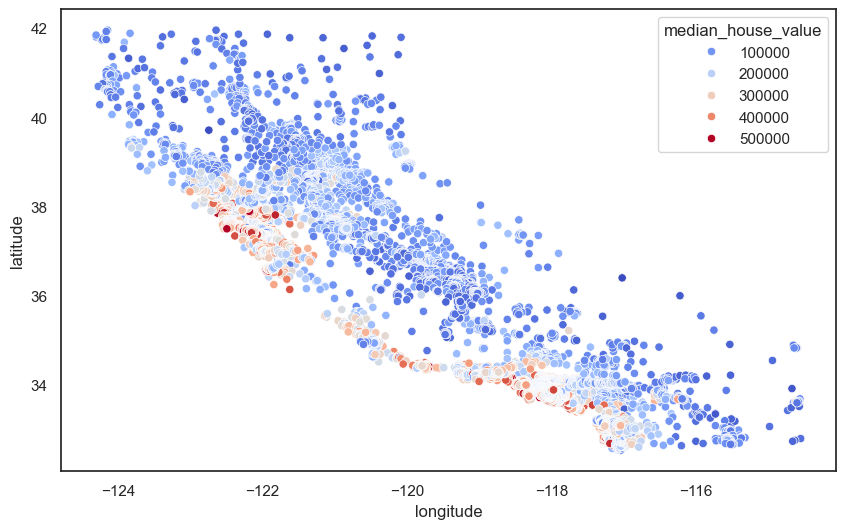

In [19]:
# não é o gráfico ideal
# pegando a coluna target para usara correlação para demonstração gráfica na dispersão
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=df, x="longitude", y="latitude", ax=ax, hue="median_house_value", palette=PALETTE);

        Visualizando a dispersão geográfica pelo target, que é a mediana dos valores das casas em um bloco, como estamos com dados contínuos e a legenda separou os valores em apenas cinco categorias, a visuaização correta fica um pouco precária, já que existem outras tonalidades que constam no gráfico, mas não na legenda. Uma solução para essa situação é colocar uma escala de cores para variação do valor mediano das casas em um bloco.

Quando for usado um gráfico de dispersão com o parâmetro hue tendo um argumento com valores contínuos, é necessário criar uma barra com escalas de cores para evidenciar uma escala de cores referente aos valores existentes. Ao criar um gráfico de dispersão da forma comum, com o parâmetro hue recebendo valores categóricos não tem problema manter a legenda, mas valores contínuos não são aproveitados da maneira correta. Os valores contínuos aparecem em forma de categoria no hue, ocultando algumas informações que podem fazer diferença na tomada de decisão.

Criando um gráfico de dispersão adequado para um hue com valores contínuos:
- primeiro, é criado o sistema de eixo;
- segundo, é guardada a normalização dos valores, entre o mínimo e o máximo de uma determinada variável, em um objeto;
- terceiro, a escala de cores (sm) recebe a normalização dos valores para criar uma escala de valores compatíveis com os valores contínuos;
- quarto, cria o gráfico de dispersão com os parâmetros necessários;
- quinto, remove a legenda da figura;
- sexto, cria a barra de cores com a escala de cores normalizadas e atribui o sistema de eixo. 

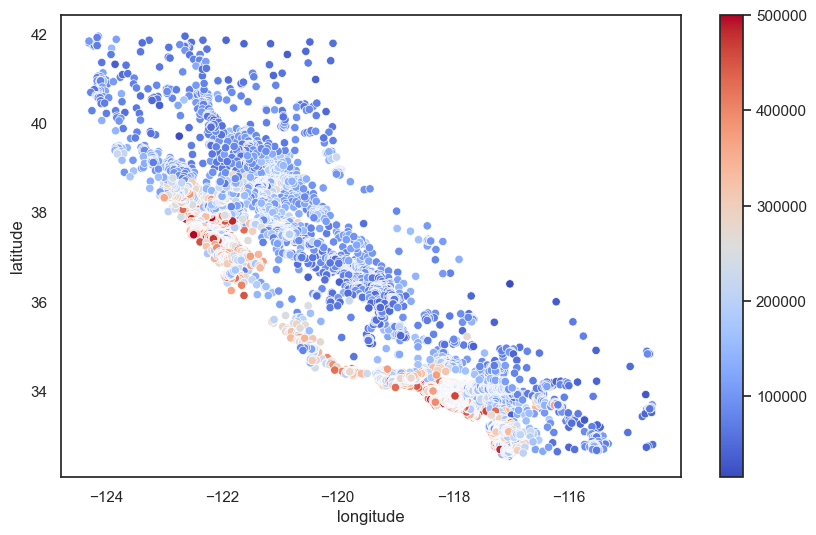

In [37]:
fig, ax = plt.subplots(figsize=(10,6))

norm_median_house_value = plt.Normalize(df["median_house_value"].min(), df["median_house_value"].max())
sm_median_house_value = plt.cm.ScalarMappable(norm=norm_median_house_value, cmap=PALETTE)

sns.scatterplot(data=df, x="longitude", y="latitude", ax=ax, alpha=1, hue="median_house_value", palette=PALETTE)

ax.get_legend().remove()

fig.colorbar(sm_median_house_value, ax=ax);

        O gráfico com a escala de cores, aparentemente, condiz com a observação realizada a partir da correlação entre a longitude, latitude e median_value_cat. As casas mais próximas da baia e de cidades mais famosas e movimentadas, como Los Angeles e San Diegp, apresentam casas com os maiores valores, enquanto casas para o interior, Norte ou Sul do estado predominam casas com valores mais baixos. As casas com valores intermediários estão espalhadas, mas parecem estar rodeando a baia, praias e parte das cidades mais famosas, fazendo uma separação entre as casas com valores mais elevados das casas com menores valores.